In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
%matplotlib inline

I am applying Handwritten Chracter Recognition using Keras.


In this phase, i am loading data into our notebook.

In [14]:
data = pd.read_csv('..//Dataset//A_Z Handwritten Data.csv')
df = pd.read_csv('..//Dataset/MNIST Digit Dataset.csv')
print(data.shape) # (372451, 785)

data.rename(columns={'0':'label'}, inplace=True)

print(data.head())

X = data.drop('label',axis = 1)
y = data['label']
X.columns = np.arange(1, 785)
x = df.drop('label', axis = 1)
x.columns = np.arange(1, 785)

(372450, 785)
   label  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  \
0      0    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      0    0    0    0    0    0    0    0    0    0  ...      0      0   
3      0    0    0    0    0    0    0    0    0    0  ...      0      0   
4      0    0    0    0    0    0    0    0    0    0  ...      0      0   

   0.641  0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]


In [15]:
data['label'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int64)

In [16]:
label = dict(zip(df['label'].unique(), df['label'].unique() + 26))
df['label'] = list(map(lambda x: label[x],df['label']))

In [17]:
X = X.append(x, ignore_index = True)
print (X.shape)

(414450, 784)


In [18]:
def display_data(images, size):
     n = len(images)
     plt.figure()
     plt.gca().set_axis_off()
     im = np.vstack([np.hstack([images[np.random.choice(n)] for i in range(size)])
     for i in range(size)])
     plt.imshow(im)
     plt.show()

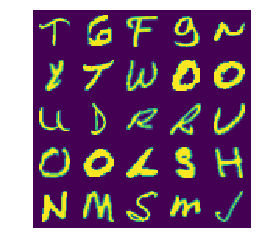

In [19]:
display_data(np.array(X).reshape(-1, 28, 28), 5)

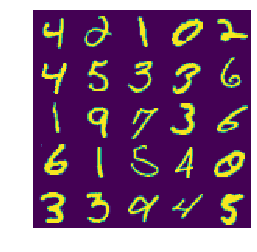

In [20]:
display_data(np.array(x).reshape(-1, 28, 28), 5)

In [21]:
y = y.append(df['label'], ignore_index=True)
print (y.shape)

(414450,)


I am using Minimum Maximum Scalar. 

And splitting data into training and testing data.


In [22]:
(X_train, X_test, Y_train, Y_test) = train_test_split(X, y)

standard_scaler = MinMaxScaler()
standard_scaler.fit(X_train)

X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

print(X_train.shape) 

Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

print(Y_test.shape) 

num_classes = Y_test.shape[1]


C:\Users\ritik\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


(310837, 28, 28, 1)
(103613, 36)


In [23]:
model = Sequential()

model.add(Conv2D(64, (5, 5), input_shape=(28, 28, 1), activation='relu', data_format="channels_last", padding="same"))
model.add(Conv2D(64, (5, 5), input_shape=(28, 28, 1), activation='relu', data_format="channels_last", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', data_format="channels_last", padding="same"))
model.add(Conv2D(128, (3, 3), activation='relu', data_format="channels_last", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=5, batch_size=256, verbose=1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 310837 samples, validate on 103613 samples
Epoch 1/5
310837/310837 [==============================] - 454s 1ms/step - loss: 0.1923 - acc: 0.9474 - val_loss: 0.0930 - val_acc: 0.9755
Epoch 2/5
310837/310837 [==============================] - 434s 1ms/step - loss: 0.0727 - acc: 0.9798 - val_loss: 0.0681 - val_acc: 0.9804
Epoch 3/5
310837/310837 [==============================] - 433s 1ms/step - loss: 0.0555 - acc: 0.9845 - val_loss: 0.0591 - val_acc: 0.9846
Epoch 4/5
310837/310837 [==============================] - 433s 1ms/step - loss: 0.0436 - acc: 0.9873 - val_loss: 0.0499 - val_acc: 0.9862
Epoch 5/5
310837/310837 [==============================] - 433s 1ms/step - loss: 0.0361 - acc: 0.9895 - val_loss: 0.0514 - val_acc: 0.9852


In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        1664      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 128)         0         
__________

In [34]:
history.history

{'val_loss': [0.09298783362890582,
  0.06814005057780045,
  0.059069657460456663,
  0.04988066810246011,
  0.051417064990688995],
 'val_acc': [0.9754663990425285,
  0.9803982126180452,
  0.9845772248673315,
  0.9861696891333984,
  0.9851756053426126],
 'loss': [0.1923232526413907,
  0.07274492342337806,
  0.05551391239725842,
  0.04357016141631318,
  0.036052045094176643],
 'acc': [0.9474290383730858,
  0.9797675308948898,
  0.9844966976285798,
  0.9873084607069778,
  0.9894671483792948]}

In [35]:
pd.DataFrame(history.history)

,val_loss,val_acc,loss,acc
0,0.092988,0.975466,0.192323,0.947429
1,0.068140,0.980398,0.072745,0.979768
2,0.059070,0.984577,0.055514,0.984497
3,0.049881,0.986170,0.043570,0.987308
4,0.051417,0.985176,0.036052,0.989467


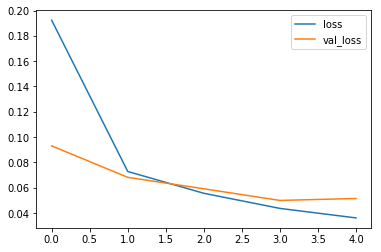

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.xlabel('Iteration ==>')
plt.ylabel('L')

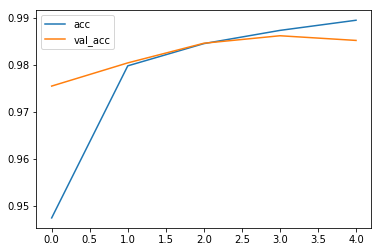

In [40]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])